# Inteligência Artificial - Trabalho Final

### Discentes:

Luca Mascarenhas Plaster - 202014610

Pedro Augusto Serafim Belo - 202003610

Diego Enrique da Silva Lima - 202003556

# **Etapa 1: Configuração do Ambiente no Google Colab**

In [ ]:
# Bibliotecas
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Clonando o repositório da YOLOv5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Instalando os requisitos
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16383, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 16383 (delta 138), reused 151 (delta 70), pack-reused 16106
Receiving objects: 100% (16383/16383), 15.14 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (11171/11171), done.
/content/yolov5/yolov5


In [ ]:
# Verificar a GPU disponível
!nvidia-smi

Fri Jan 26 15:18:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Etapa 2: Preparação dos Dados**

In [ ]:
# Carregando dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Etapa 3: Configuração de Arquivos de Dados e Modelo**

In [ ]:
%%writefile data.yaml
train: /content/drive/Shareddrives/Datasets/train/images
val: /content/drive/Shareddrives/Datasets/valid/images
test: /content/drive/Shareddrives/Datasets/test/images

nc: 3
names: ['verde', 'vermelho', 'amarelo']

Writing data.yaml


# **Etapa 4: Treinamento do Modelo**

In [ ]:
# Treinando o modelo
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt

2024-01-26 15:19:52.857183: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 15:19:52.857232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 15:19:52.858572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

# **Etapa 5: Avaliação do Modelo**

In [ ]:
# Avaliando o modelo
!python val.py --weights /content/yolov5/yolov5/runs/train/exp/weights/best.pt --data data.yaml --img 640

val: data=data.yaml, weights=['/content/yolov5/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/Shareddrives/Datasets/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:06<00:00,  1.10it/s]
                   all        200        272       0.96      0.963      0.978      0.587
                 verde        200         92      0.967      0.949      0.979      0.586
     

# **Etapa 6: Exportação e Teste do Modelo**

In [ ]:
# Salvando o modelo treinado
model = torch.load('runs/train/exp/weights/best.pt')
torch.save(model, '/content/drive/My Drive/yolov5_model.pt')

In [ ]:
# Carregando o modelo e fazer inferência em uma nova imagem
model = torch.load('/content/drive/My Drive/yolov5_model.pt')

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/Shareddrives/Datasets/test/images/traffic-light--958-_jpg.rf.e6dac474c8ba83c6010a4ad7b05acd2a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/Shareddrives/Datasets/test/images/traffic-light--958-_jpg.rf.e6dac474c8ba83c6010a4ad7b05acd2a.jpg: 640x640 1 verde, 11.6ms
Speed: 0.8ms pre-process, 11.6ms inference, 509.8ms NMS per image at shape (1, 3, 640, 64

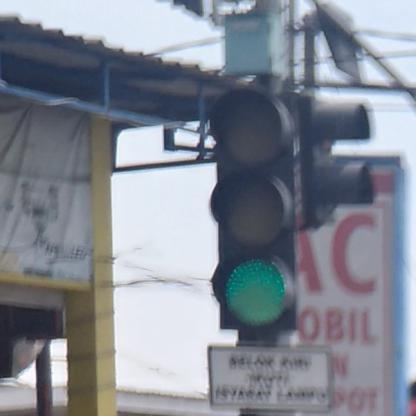

In [ ]:
# Testando o modelo
from IPython.display import Image

!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source\
'/content/drive/Shareddrives/Datasets/test/images/traffic-light--958-_jpg.rf.e6dac474c8ba83c6010a4ad7b05acd2a.jpg'

# Exibindo a imagem utilizada no teste
image_path = '/content/drive/Shareddrives/Datasets/test/images/traffic-light--958-_jpg.rf.e6dac474c8ba83c6010a4ad7b05acd2a.jpg'
print('\nImagem testada:')
Image(filename=image_path)